In [2]:
%plot --format svg

my_caller.m
```matlab
function [vx,vy] = my_caller(max_time)
    N=100;
    t=linspace(0,max_time,N);
    [x,y]=my_function(max_time);
    vx=diff(x)./diff(t);
    vy=diff(y)./diff(t);
end
```

my_function.m
```matlab
function [x,y] = my_function(max_time)
    N=100;
    t=linspace(0,max_time,N);
    x=t.^2;
    y=2*t;
end
```

In order to use `my_caller.m` where does `my_function.m` need to be saved?
![responses](q1.png)


What cool personal projects are you working on?
While we delve deeper into Matlab functions, could we review some of the basic logic
operators it uses and command codes. 

I still dont know when these forms are technically due. 
    
    -by the following lecture

I'm having trouble interfacing Atom with GitHub. Is there a simple tutorial for this?
    
    -Mac? Seems there could be a bug that folks are working on

What are the bear necessities of life? 
please go over how to "submit" the homeworks because it is still confusing

Do you prefer Matlab or Octave?
    
    -octave is my preference, but Matlab has some benefits

Would you consider a country to be open-source?
    
    -??

Is there a way to download matlab for free?
    
    -not legally

how do you add files to current folder in matlab?
    
    -you can do this either through a file browser or cli

How should Homework 2 be submitted?  By simply putting the function into the homework_1
repository?
    
    -yes
    
How can we tell that these forms are being received?
    
    -when you hit submit, the form says "form received"
    
can you save scripted outputs from matlab/octave as an excel file?
    
    -yes, easy way is open a file with a .csv extension then fprintf and separate everything with commas, harder way is to use the `xlswrite`
    

Also, can you update your notes to show what happens when these things are run, as you do
in class?"
    
    -I always update the lecture notes after class so they should display what we did in class
    
I have a little difficulty following along in class on my laptop when you have programs
pre-written.  Maybe if you posted those codes on Github so I could copy them when you
switch to different desktops I would be able to follow along better.

Kirk or Picard?
    
    -Kirk
    
Who is our TA?
    
    -Peiyu Zhang peiyu.zhang@uconn.edu

Can we download libraries of data like thermodynamic tables into matlab?
    
-YES! [Matlab Steam Tables](http://bit.ly/2kZygu8)

Will we use the Simulink addition to Matlab? I found it interesting and useful for
evaluating ODEs in Linear systems.
    
    -not in this class, everything in simulink has a matlab script/function that can be substituted, but many times its hidden by the gui. Here we want to look directly at our solvers


# Roots and Optimization
## Bracketing ch. 5

When you are given a function, numerical or analytical, it's not always possible to solve directly for a given variable. 

Even for the freefall example we first explored, 

$v(t)=\sqrt{\frac{gm}{c_{d}}}\tanh(\sqrt{\frac{gc_{d}}{m}}t)$

There is no way to solve for m in terms of the other variables. 

Instead, we can solve the problem by creating a new function f(m) where

$f(m)=\sqrt{\frac{gm}{c_{d}}}\tanh(\sqrt{\frac{gc_{d}}{m}}t)-v(t)$. 

When f(m) = 0, we have solved for m in terms of the other variables (e.g. for a given time, velocity, drag coefficient and acceleration due to gravity)

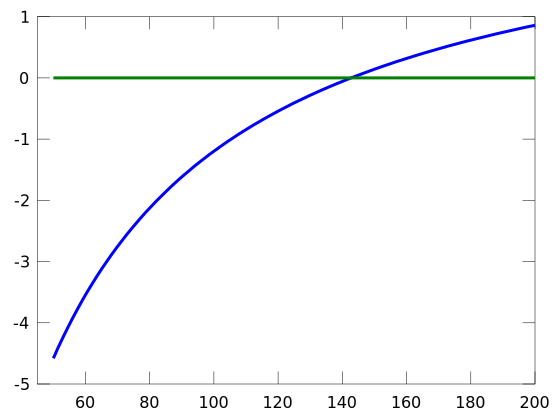

In [4]:
setdefaults
g=9.81; % acceleration due to gravity
m=linspace(50, 200,100); % possible values for mass 50 to 200 kg
c_d=0.25; % drag coefficient
t=4; % at time = 4 seconds
v=36; % speed must be 36 m/s
f_m = @(m) sqrt(g*m/c_d).*tanh(sqrt(g*c_d./m)*t)-v; % anonymous function f_m

plot(m,f_m(m),m,zeros(length(m),1))
axis([45 200 -5 1])

In [3]:
f_m(145)

ans =  0.045626


Brute force method is plot f_m vs m and with smaller and smaller steps until f_m ~ 0

Better methods are the 
1. Bracketing methods
2. Open methods

Both need an initial guess. 


## Incremental method (Brute force)

You know that for one value, m_lower, f_m is negative and for another value, m_upper, f_m is positive. 

```matlab
function xb = incsearch(func,xmin,xmax,ns)
% incsearch: incremental search root locator
%   xb = incsearch(func,xmin,xmax,ns):
%     finds brackets of x that contain sign changes
%     of a function on an interval
% input:
%   func = name of function
%   xmin, xmax = endpoints of interval
%   ns = number of subintervals (default = 50)
% output:
%   xb(k,1) is the lower bound of the kth sign change
%   xb(k,2) is the upper bound of the kth sign change
%   If no brackets found, xb = [].
if nargin < 3, error('at least 3 arguments required'), end
if nargin < 4, ns = 50; end %if ns blank set to 50
% Incremental search
x = linspace(xmin,xmax,ns);
f = func(x);
nb = 0; xb = []; %xb is null unless sign change detected
for k = 1:length(x)-1
  if sign(f(k)) ~= sign(f(k+1)) %check for sign change
    nb = nb + 1;
    xb(nb,1) = x(k);
    xb(nb,2) = x(k+1);
  end
end
if isempty(xb) %display that no brackets were found
  fprintf('no brackets found\n')
  fprintf('check interval or increase ns\n')
else
  fprintf('number of brackets: %i\n',nb) %display number of brackets
end
```

In [8]:
help incsearch

'incsearch' is a function from the file /home/ryan/Documents/UConn/ME3255/me3255_S2017/lecture_06/incsearch.m

 incsearch: incremental search root locator
   xb = incsearch(func,xmin,xmax,ns):
     finds brackets of x that contain sign changes
     of a function on an interval
 input:
   func = name of function
   xmin, xmax = endpoints of interval
   ns = number of subintervals (default = 50)
 output:
   xb(k,1) is the lower bound of the kth sign change
   xb(k,2) is the upper bound of the kth sign change
   If no brackets found, xb = [].


Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at http://www.octave.org and via the help@octave.org
mailing list.


In [24]:
incsearch(f_m,50, 200,55)

no brackets found
check interval or increase ns
ans = [](1x0)


## Bisection method

Divide interval in half until error is reduced to some level

in previous example of freefall, choose x_l=50, x_u=200

x_r = (50+200)/2 = 125

f_m(125) = -0.408

x_r= (125+200)/2 = 162.5

f_m(162.5) = 0.3594

x_r = (125+162.5)/2=143.75

f_m(143.75)= 0.0206

In [7]:
f_m(143.75)

ans =  0.020577


Much better root locator, with 4 iterations, our function is already close to zero

Automate this with a function:
`bisect.m`

```matlab
function [root,fx,ea,iter]=bisect(func,xl,xu,es,maxit,varargin)
% bisect: root location zeroes
% [root,fx,ea,iter]=bisect(func,xl,xu,es,maxit,p1,p2,...):
% uses bisection method to find the root of func
% input:
% func = name of function
% xl, xu = lower and upper guesses
% es = desired relative error (default = 0.0001%)
% maxit = maximum allowable iterations (default = 50)
% p1,p2,... = additional parameters used by func
% output:
% root = real root
% fx = function value at root
% ea = approximate relative error (%)
% iter = number of iterations
if nargin<3,error('at least 3 input arguments required'),end
test = func(xl,varargin{:})*func(xu,varargin{:});
if test>0,error('no sign change'),end
if nargin<4|isempty(es), es=0.0001;end
if nargin<5|isempty(maxit), maxit=50;end
iter = 0; xr = xl; ea = 100;
while (1)
  xrold = xr;
  xr = (xl + xu)/2;
  iter = iter + 1;
  if xr ~= 0,ea = abs((xr - xrold)/xr) * 100;end
  test = func(xl,varargin{:})*func(xr,varargin{:});
  if test < 0
    xu = xr;
  elseif test > 0
    xl = xr;
  else
    ea = 0;
  end
  if ea <= es | iter >= maxit,break,end
end
root = xr; fx = func(xr, varargin{:});
```

## False position (linear interpolation)

Rather than bisecting each bracket (1/2 each time) we can calculate the slope between the two points and update the xr position in this manner

$ x_{r} = x_{u} - \frac{f(x_{u})(x_{l}-x_{u})}{f(x_{l})-f(x_{u})}$

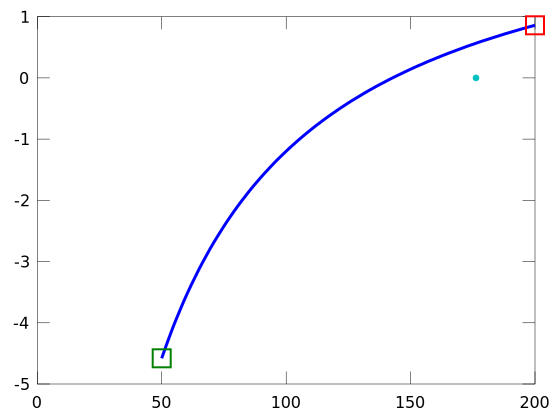

In [21]:
xl=50; xu=200; 
xr=xu - (f_m(xu)*(xl-xu))/(f_m(xl)-f_m(xu));

plot(m,f_m(m),xl,f_m(xl),'s',xu,f_m(xu),'s',xr,0)

Much better root locator, with 4 iterations, our function is already close to zero

Automate this with a function:
`falsepos.m`

```matlab
function [root,fx,ea,iter]=falsepos(func,xl,xu,es,maxit,varargin)
% falsepos: root location zeroes
% [root,fx,ea,iter]=bisect(func,xl,xu,es,maxit,p1,p2,...):
% uses false position method to find the root of func
% input:
% func = name of function
% xl, xu = lower and upper guesses
% es = desired relative error (default = 0.0001%)
% maxit = maximum allowable iterations (default = 50)
% p1,p2,... = additional parameters used by func
% output:
% root = real root
% fx = function value at root
% ea = approximate relative error (%)
% iter = number of iterations
if nargin<3,error('at least 3 input arguments required'),end
test = func(xl,varargin{:})*func(xu,varargin{:});
if test>0,error('no sign change'),end
if nargin<4|isempty(es), es=0.0001;end
if nargin<5|isempty(maxit), maxit=50;end
iter = 0; xr = xl; ea = 100;
while (1)
  xrold = xr;
  % xr = (xl + xu)/2; % bisect method
  xr=xu - (f_m(xu)*(xl-xu))/(f_m(xl)-f_m(xu)); % false position method
  iter = iter + 1;
  if xr ~= 0,ea = abs((xr - xrold)/xr) * 100;end
  test = func(xl,varargin{:})*func(xr,varargin{:});
  if test < 0
    xu = xr;
  elseif test > 0
    xl = xr;
  else
    ea = 0;
  end
  if ea <= es | iter >= maxit,break,end
end
root = xr; fx = func(xr, varargin{:});
```